## Model of a car with disturbances (slope)

p. 242, fig. 6.8

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import constants
from matplotlib import pyplot as plt

In [3]:
def slope_model(x):
        
    if x < 1000:
        return 0
    
    if x >= 1000 and x < 2000:
        return np.pi / 6
    
    return 0


def eval_model(model, xs):
    return np.array(list(map(model, xs)))

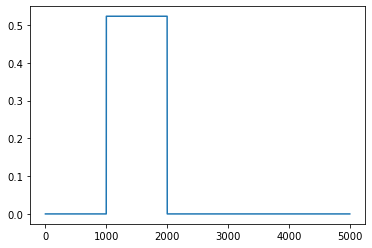

In [4]:
xs = np.arange(0, 5000)

plt.plot(xs, eval_model(slope_model, xs))
plt.show()

In [5]:
def create_car_diff_eq(m, k, F, slope_func):

    def equation(t, y):

        x, v = y
        
        theta = slope_func(x)

        deriv_x = v
        deriv_v = (F - k * v - m * constants.g * np.sin(theta)) / m
        
        return np.array([deriv_x, deriv_v])
        
    return equation

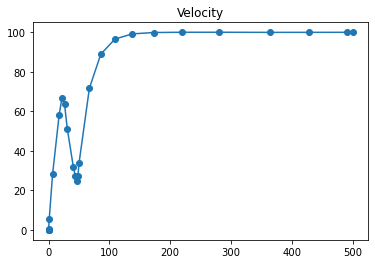

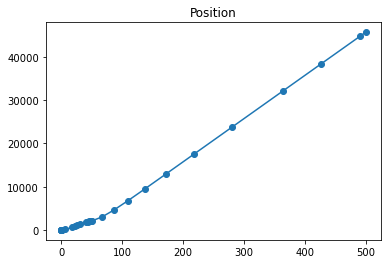

In [6]:
eq = create_car_diff_eq(m=1000, k=50, F=5000, slope_func=slope_model)

sol = solve_ivp(eq, [0, 500], [0, 0])

plt.figure()
plt.plot(sol.t, sol.y[1], 'o-')
plt.title('Velocity')

plt.figure()
plt.plot(sol.t, sol.y[0], 'o-')
plt.title('Position')

plt.show()